# Exploration of the Blind Mode dataset

## Set up

In [1]:
# Set up to use local modules
%load_ext autoreload
%autoreload 2
import os
import sys
module_path = os.path.abspath(os.path.join('..')) # Add parent directory to path
sys.path.insert(0, module_path)

In [2]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Local imports
from src import process
from src import plot
from src import util

In [3]:
# Load data
blind_mode_df, estimates_df = process.load_and_process_results()

## Basic visualization

In [4]:
# The entire data set from the blind mode contest
# Includes blind mode participants' predictions and some demographic data
blind_mode_df.head()

,Whichmodeareyouplayingin,ForecastingExperience,Superforecaster,LessWrong,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,...,Wouldyouquotwireheadquotifyouhadtheoption,Howmuchdoyoutrustthemainstreammedia,Ifyouanswered1or2mostlydistrustonthequestionabovewhichoftheseeve,OptionalWasthereanyotherspecificarticleoreventthatseriouslyunder,Howgoodasenseofdirectionorientationandnavigationdoyouhave,Howmuchdoflashingorchangingelementsdetractfromyourenjoymentofweb,Howmanybrowsertabsdoyouhaveopenrightnow,Howmanyunreademailsareinyourinboxrightnow,SupposeItoldyouthatyourfirstguessabouthowthedistancebetweenParis,Ifyouaposvetriedpsychotherapyforanyissuehowwelldiditwork
0,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,99.0,1.0,...,1.0,1.0,"COVID (later support for vaccines, masks, lock...",None,1.0,I notice these and they annoy me a little,10 - 50,1651,2000.0,5.0
1,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,50.0,85.0,15.0,...,2.0,1.0,"COVID (later support for vaccines, masks, lock...",all of the above plus a constant blizzard of o...,4.0,I notice them and they annoy me so much that I...,More than 50,0,1850.0,NaN
2,Blind Mode (recommended),No,No,No,99.0,1.0,50.0,33.0,1.0,20.0,...,1.0,4.0,None,None,2.0,I notice these and they annoy me a little,2-5,1,8000.0,NaN
3,Blind Mode (recommended),No,No,No,99.0,1.0,1.0,1.0,50.0,10.0,...,1.0,1.0,Attempt to link Trump to Russia,Effective cancelling of Simon Bridges,4.0,I notice them and they annoy me quite a bit,10 - 50,2,3000.0,NaN
4,Blind Mode (recommended),No,No,No,99.0,30.0,30.0,75.0,40.0,80.0,...,4.0,4.0,None,None,4.0,I notice them and they annoy me quite a bit,5 - 10,0,2000.0,NaN


In [5]:
# Just the predictions extracted from the blind mode dataset
estimates_df.head()

,@1.WillVladimirPutinbePresidentofRussia,@2.WillUkrainecontrolthecityofSevastopol,@3.WillUkrainecontrolthecityofLuhansk,@4.WillUkrainecontrolthecityofZaporizhzhia,@5.WilltherebealastingceasefireintheRussiaUkrainewar,@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit,@7.WillanissueinvolvinganuclearpowerplantinUkrainerequireevacuat,@8.Willanuclearweaponbedetonatedincludingtestsandaccidents,@9.Willanuclearweaponbeusedinwarienotatestoraccidentandkillatlea,@10.WillChinalaunchafullscaleinvasionofTaiwan,...,@41.WillanimagemodelwinScottAlexander’sbetoncompositionalitytoEd,@42.WillCOVIDkillatleast50asmanypeoplein2023asitdidin2022,@43.WillanewversionofCOVIDbesubstantiallyabletoescapeOmicronvacc,@44.WillGoogleMetaAmazonorApplereleaseanARheadset,@45.WillanordinarypersonbeabletotakeaselfdrivingtaxifromOaklandS,@46.WillaculturedmeatproductbeavailableinatleastoneUSstoreorrest,@47.Willasuccessfuldeepfakeattemptcausingrealdamagemakethefrontp,@48.WillWHOdeclareanewGlobalHealthEmergency,@49.WillAIwinaprogrammingcompetition,@50.WillsomeonereleasequotDALLEbutforvideosquot
0,99.0,1.0,1.0,1.0,99.0,1.0,1.0,1.0,1.0,1.0,...,50.0,1.0,99.0,99.0,1.0,1.0,1.0,1.0,99.0,99.0
1,99.0,1.0,50.0,50.0,85.0,15.0,30.0,15.0,15.0,2.0,...,98.0,2.0,97.0,50.0,50.0,50.0,4.0,15.0,45.0,55.0
2,99.0,1.0,50.0,33.0,1.0,20.0,1.0,1.0,1.0,1.0,...,60.0,25.0,25.0,25.0,5.0,1.0,10.0,3.0,5.0,10.0
3,99.0,1.0,1.0,1.0,50.0,10.0,25.0,1.0,1.0,5.0,...,50.0,99.0,99.0,1.0,1.0,10.0,1.0,90.0,15.0,1.0
4,99.0,30.0,30.0,75.0,40.0,80.0,40.0,10.0,10.0,20.0,...,90.0,30.0,40.0,60.0,70.0,60.0,70.0,20.0,90.0,70.0


Median:  85.0
Mean:    80.36
Std:     17.98


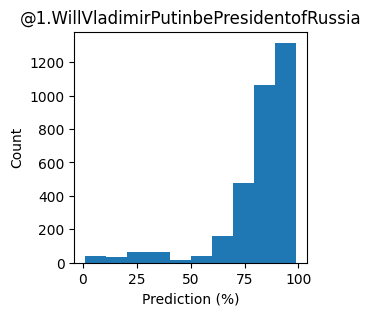

In [6]:
# Histogram of predictions for the 1st question
fig = plt.figure(figsize=(3, 3))
ax = plot.pred_hist(blind_mode_df, 1, print_stats=True)
plt.show()

Median:  25.0
Mean:    33.6
Std:     27.87


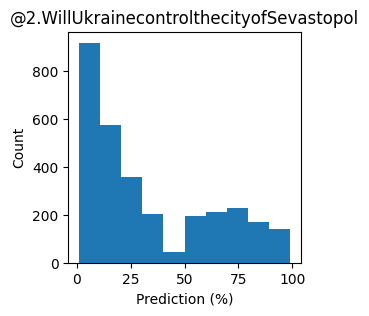

In [7]:
# Histogram of predictions for the 2nd question
fig = plt.figure(figsize=(3, 3))
ax = plot.pred_hist(blind_mode_df, 2, print_stats=True)
plt.show()

## Response rates

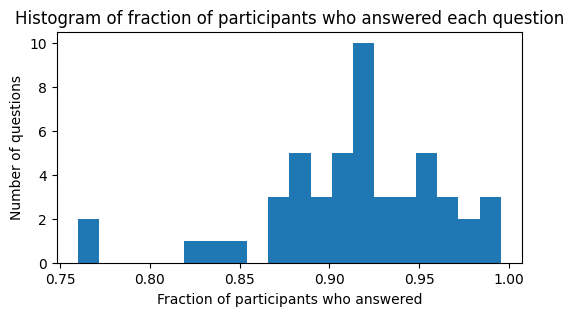

In [8]:
# For each question, calculate the fraction of nans, then plot histogram of that
questions_fraction_answered = 1 - (estimates_df.isna().mean())
fig = plt.figure(figsize=(6, 3))
plt.hist(questions_fraction_answered, bins=20)
plt.xlabel("Fraction of participants who answered")
plt.ylabel("Number of questions")
plt.title("Histogram of fraction of participants who answered each question")
plt.show()

In [9]:
# Sort and print the questions by the fraction of participants who answered
sorted_indices = questions_fraction_answered.sort_values().index
for i in sorted_indices:
    print(i, questions_fraction_answered[i])

@36.WillTetherdepeg 0.7599393019726859
@41.WillanimagemodelwinScottAlexander’sbetoncompositionalitytoEd 0.7693474962063733
@40.WillSpaceXapossStarshipreachorbit 0.8261001517450683
@26.WilltheUKholdageneralelection 0.8330804248861912
@33.WilltheShanghaiindexofChinesestocksgoupover2023 0.8452200303490136
@44.WillGoogleMetaAmazonorApplereleaseanARheadset 0.8698027314112291
@35.WillBitcoinend2023above$30000 0.8761760242792109
@39.WillOpenAIreleaseGPT4 0.876783004552352
@6.WilltheKerchBridgebedestroyedsuchthatnovehiclecanpassoverit 0.8786039453717754
@43.WillanewversionofCOVIDbesubstantiallyabletoescapeOmicronvacc 0.8828528072837633
@46.WillaculturedmeatproductbeavailableinatleastoneUSstoreorrest 0.883763277693475
@4.WillUkrainecontrolthecityofZaporizhzhia 0.8855842185128984
@25.WillRishiSunakbePrimeMinisteroftheUK 0.8858877086494689
@49.WillAIwinaprogrammingcompetition 0.8974203338391502
@19.WilltheSupremeCourtruleagainstaffirmativeaction 0.9001517450682853
@45.Willanordinarypersonbeableto

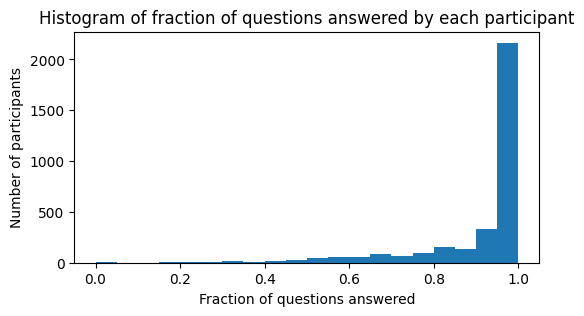

In [10]:
# Do the same, but for each participant
participants_fraction_answered = 1 - (estimates_df.isna().mean(axis=1))
fig = plt.figure(figsize=(6, 3))
plt.hist(participants_fraction_answered, bins=20)
plt.xlabel("Fraction of questions answered")
plt.ylabel("Number of participants")
plt.title("Histogram of fraction of questions answered by each participant")
plt.show()

In [11]:
# Calculation the fraction of participants_fraction_answered equal to 1 or 0
print(
    "Fraction of participants who answered all questions:",
    np.mean(participants_fraction_answered == 1).round(4),
)
print(
    "Number of participants who answered no questions:",
    np.sum(participants_fraction_answered == 0),
)

Fraction of participants who answered all questions: 0.5108
Number of participants who answered no questions: 3


## Estimate vector comparisons

In [12]:
# Get the values from estimates_df and convert to a numpy array
estimates_matrix = estimates_df.values

In [13]:
# Are any rows of estimates_matrix identical?
# Calculate the number of rows that are identical
print(f"{len(estimates_matrix)} rows in estimates_matrix")
print(f"{len(np.unique(estimates_matrix, axis=0))} unique rows in estimates_matrix")
print(
    f"{len(estimates_matrix) - len(np.unique(estimates_matrix, axis=0))} duplicate rows in estimates_matrix"
)

# Print the duplicate rows
print("All duplicate rows:")
duplicate_rows = pd.DataFrame(estimates_matrix).duplicated()
duplicate_rows = pd.DataFrame(estimates_matrix[duplicate_rows])
duplicate_rows

3295 rows in estimates_matrix
3295 unique rows in estimates_matrix
0 duplicate rows in estimates_matrix
All duplicate rows:


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
print("Replacing nans with median of each question")
estimates_matrix = np.nan_to_num(estimates_matrix, nan=estimates_df.median())
estimates_matrix = estimates_matrix / 100
estimates_matrix.shape

Replacing nans with median of each question


(3295, 50)

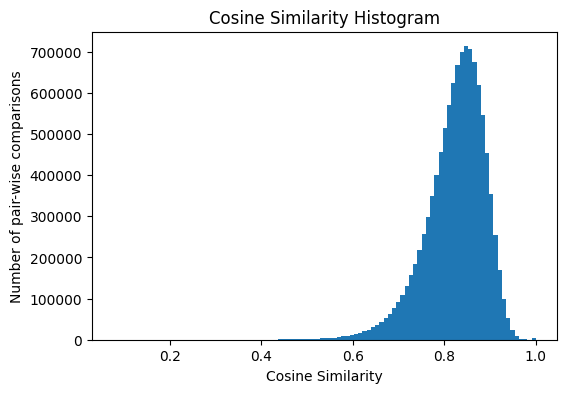

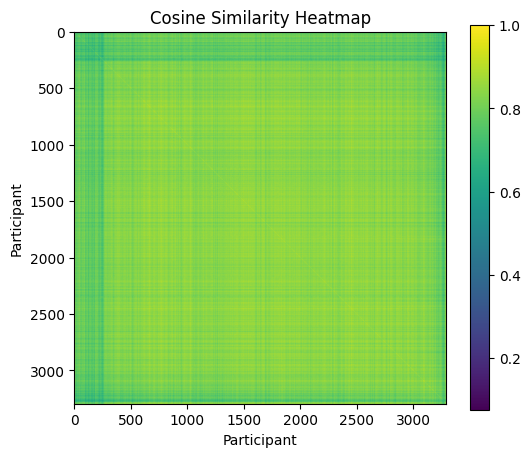

Dendrogram clustering skipped


In [15]:
# Calculate the pair-wise cosine similarity between all rows of estimates_matrix
cosine_similarity = cosine_similarity(estimates_matrix)

# Histogram
fig = plt.figure(figsize=(6, 4))
plt.hist(cosine_similarity.flatten(), bins=100)
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of pair-wise comparisons")
plt.title("Cosine Similarity Histogram")
plt.show()

# Heatmap, sorted by brier score
fig = plt.figure(figsize=(6, 5))
plt.imshow(cosine_similarity)
plt.xlabel("Participant")
plt.ylabel("Participant")
plt.title("Cosine Similarity Heatmap")
plt.colorbar()
plt.show()

# Use linkage and dendrogram to produce clustering and 
# sort the rows and columns of the heatmap
plot_dendrogram = False
if plot_dendrogram:
    # Plot a Heatmap, with rows and columns sorted with a clustering algorithm
    from scipy.cluster.hierarchy import dendrogram, linkage

    # Use linkage and dendrogram to produce clustering
    Z = linkage(cosine_similarity, method="ward")
    # Use linkage clustering to sort the rows and columns of the heatmap
    fig = plt.figure(figsize=(4, 4))
    group_sorting = np.argsort(Z[:, 3])
    sorted_cosine_similarity = cosine_similarity[group_sorting, :][:, group_sorting]
    plt.imshow(sorted_cosine_similarity)
    plt.xlabel("Participant")
    plt.ylabel("Participant")
    plt.title("Cosine Similarity Heatmap")
    plt.colorbar()
    plt.show()

    fig = plt.figure(figsize=(4, 4))
    dendrogram_dictionary = dendrogram(Z)
    plt.title("Dendrogram")
    plt.xlabel("Participant")
    plt.ylabel("Distance")
    plt.show()

    fig = plt.figure(figsize=(4, 4))
    plt.imshow(
        cosine_similarity[dendrogram_dictionary["leaves"], :][
            :, dendrogram_dictionary["leaves"]
        ]
    )
    plt.xlabel("Participant")
    plt.ylabel("Participant")
    plt.title("Cosine Similarity Heatmap")
    plt.colorbar()
    plt.show()
else:
    print("Dendrogram clustering skipped")

## Analysis by group

In [16]:
# Fraction of respondent properties
pred_classes = ["ForecastingExperience", "Superforecaster", "LessWrong"]
for pred_class in pred_classes:
    frac_yes = blind_mode_df[pred_class].str.count("Yes").mean()
    print(f"% participants {pred_class}: {(100 * frac_yes).round(1)}")

% participants ForecastingExperience: 29.2
% participants Superforecaster: 1.7
% participants LessWrong: 21.1


"Yeses" have average predictions -1.09 greater than "nos"
43.14 vs 44.23


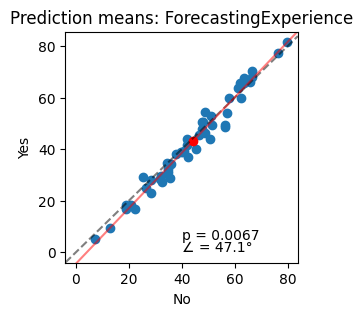

"Yeses" have average predictions 0.0 greater than "nos"
40.0 vs 40.0


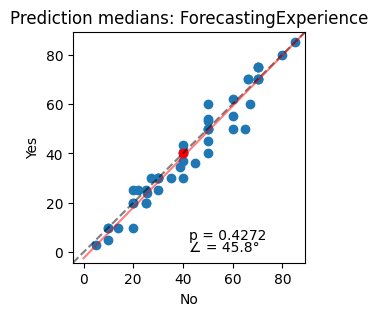

"Yeses" have average predictions 0.26 greater than "nos"
44.17 vs 43.91


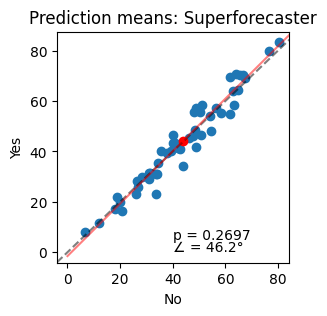

In [17]:
# Compare histograms by different self-identified labels
# (experience, superforcaster, lesswrong)
# Means
fig = plot.demo_pred_scatter(
    data=blind_mode_df,
    demo_attribue="ForecastingExperience",
    statistic="mean",
    fit_line=True,
    print_stats=True,
)
plt.show()
fig = plot.demo_pred_scatter(
    data=blind_mode_df,
    demo_attribue="ForecastingExperience",
    statistic="median",
    fit_line=True,
    print_stats=True,
)
plt.show()
fig = plot.demo_pred_scatter(
    data=blind_mode_df,
    demo_attribue="Superforecaster",
    statistic="mean",
    fit_line=True,
    print_stats=True,
)
plt.show()

"Yeses" have average predictions 0.0 greater than "nos"
40.0 vs 40.0


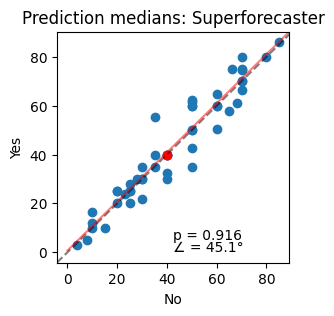

"Yeses" have average predictions -0.16 greater than "nos"
43.77 vs 43.93


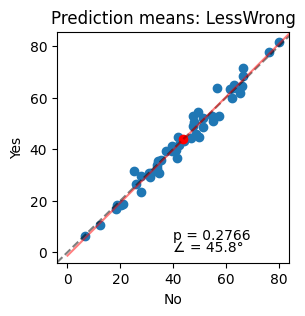

"Yeses" have average predictions 0.0 greater than "nos"
40.0 vs 40.0


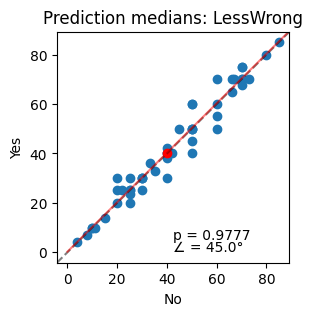

In [18]:
# Medians
fig = plot.demo_pred_scatter(
    data=blind_mode_df,
    demo_attribue="Superforecaster",
    statistic="median",
    fit_line=True,
    print_stats=True,
)
plt.show()
fig = plot.demo_pred_scatter(
    data=blind_mode_df,
    demo_attribue="LessWrong",
    statistic="mean",
    fit_line=True,
    print_stats=True,
)
plt.show()
fig = plot.demo_pred_scatter(
    data=blind_mode_df,
    demo_attribue="LessWrong",
    statistic="median",
    fit_line=True,
    print_stats=True,
)
plt.show()

Question:  @1.WillVladimirPutinbePresidentofRussia
All participant median:  85.0
ForecastingExperience median:  85.0
Superforecaster median:  86.0
LessWrong median:  85.0


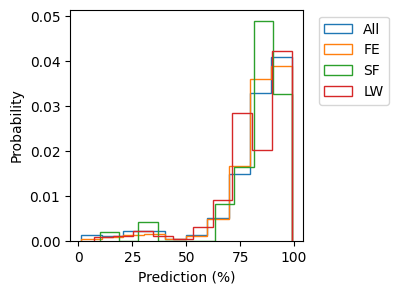

Question:  @2.WillUkrainecontrolthecityofSevastopol
All participant median:  25.0
ForecastingExperience median:  20.0
Superforecaster median:  20.0
LessWrong median:  23.5


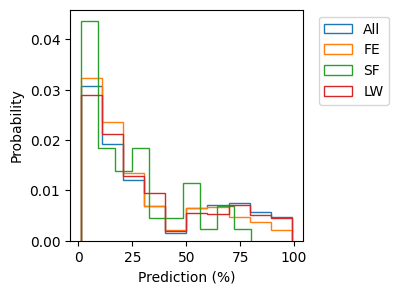

In [19]:
# Histogram comparing different classes
fig = plot.demo_pred_hist(blind_mode_df, q_num=1, print_stats=True)
plt.show()
fig = plot.demo_pred_hist(blind_mode_df, q_num=2, print_stats=True)
plt.show()

Difference between all and ForecastingExperience medians


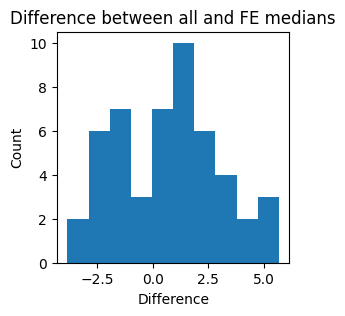

@1.WillVladimirPutinbePresidentofRussia                -1.129882
@2.WillUkrainecontrolthecityofSevastopol                4.965927
@3.WillUkrainecontrolthecityofLuhansk                   3.751181
@4.WillUkrainecontrolthecityofZaporizhzhia             -1.151819
@5.WilltherebealastingceasefireintheRussiaUkrainewar    0.351718
dtype: float64

In [20]:
# Histogram comparing for each question the difference between the median prediction
# and the median prediction for those with forecasting experience

fe_estimate_df = estimates_df.loc[
    blind_mode_df["ForecastingExperience"].values == "Yes"
]

print("Difference between all and ForecastingExperience medians")
median_diffs = estimates_df.mean(axis=0) - fe_estimate_df.mean(axis=0)

fig = plt.figure(figsize=(3, 3))
plt.hist(median_diffs)
plt.title("Difference between all and FE medians")
plt.xlabel("Difference")
plt.ylabel("Count")
plt.show()

median_diffs.head()

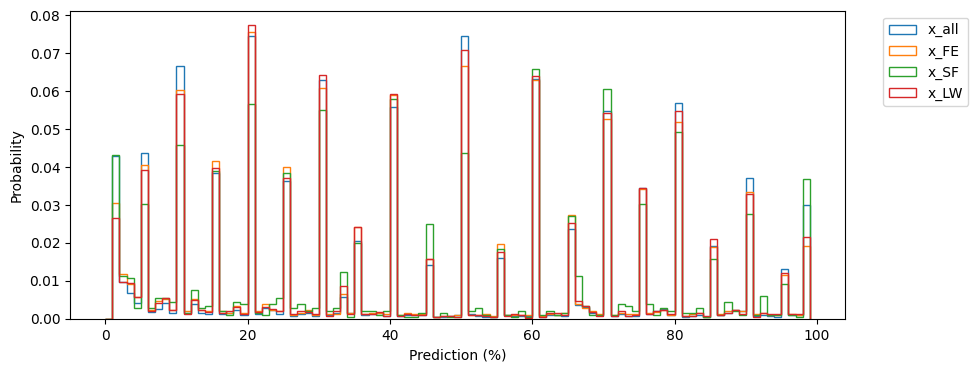

In [21]:
# Flatten the prediction df to aggregate all predictions by group
flattened_prediction_df = process.flatten_prediction_df(blind_mode_df)

# Histogram of all combined predictions by group, with integer bins
fig = plot.all_prediction_hist_by_group(flattened_prediction_df)
plt.show()

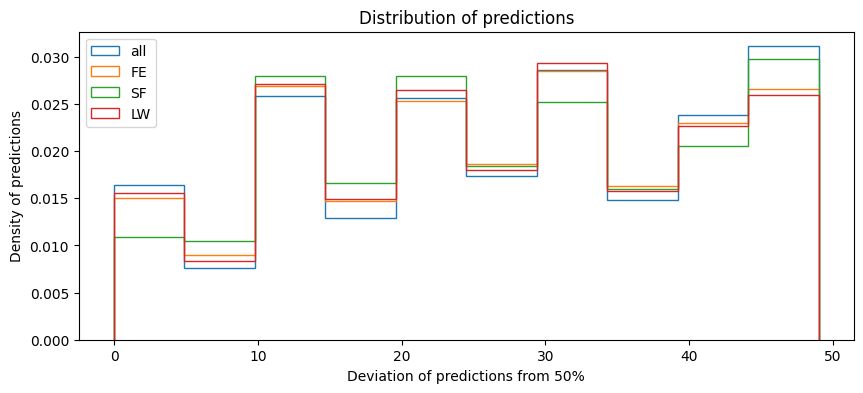

In [22]:
# Does forecasting experience cause people to make more extreme predictions?
# More extreme meaning further from 50%
abs_diff_flattened_df = process.abs_diff_from_50(flattened_prediction_df)
fig = plot.all_predictions_deviation_from_50_histogram(abs_diff_flattened_df)
plt.show()

all vs all: KstestResult(statistic=0.0, pvalue=1.0)
all mean: 25.899
all slope: [0.02059433]
FE vs all: KstestResult(statistic=0.02600024636609999, pvalue=1.3032632630479704e-11)
FE mean: 25.321
FE slope: [0.02038684]
SF vs all: KstestResult(statistic=0.03358770535241118, pvalue=0.03292170549930795)
SF mean: 25.686
SF slope: [0.02058323]
LW vs all: KstestResult(statistic=0.032248809428791936, pvalue=4.682678603154221e-13)
LW mean: 25.135
LW slope: [0.02029544]


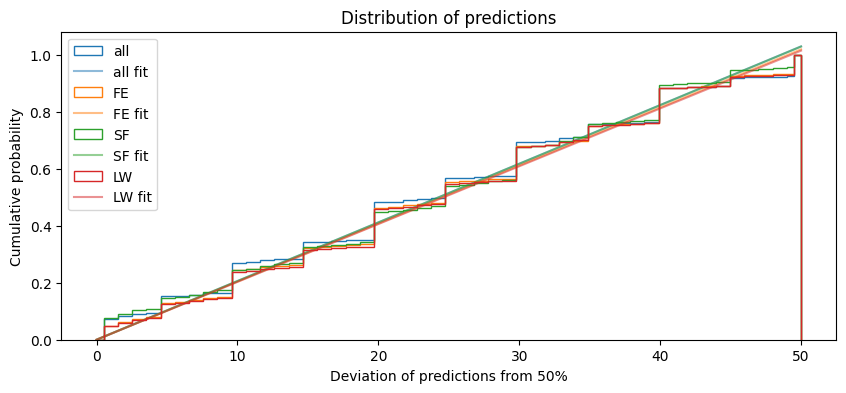

In [23]:
# Perform distribution comparisons between groups of abs_diff_df
# to see if they are statistically different

# First, plot the empirical cdfs of each class in flattened_prediction_df["class"]
# to see if they are visually different

fig = plot.empirical_abs_diff_cdf_by_class(abs_diff_flattened_df, calc_statistics=True)
plt.show()

In [24]:
# For each class, print the fractions of predictions matching the stated values
util.print_fraction_predictions_not_rounded(flattened_prediction_df)


Fraction of predictions at the extreme (1 or 99)


all: 0.0713
 FE: 0.0478
 SF: 0.0778
 LW: 0.0464

Fraction of predictions that are not 1, 99, or divisible by 5
all: 0.1224
 FE: 0.1546
 SF: 0.2065
 LW: 0.1496

Fraction of predictions that are not divisible by 5
all: 0.1936
 FE: 0.2025
 SF: 0.2843
 LW: 0.196



ne = [1, 99]
all: 0.9287462863933452
FE: 0.9521544715447154
SF: 0.9221621621621622
LW: 0.9535522388059702
All vs FE: stat=168.921, p=0.000000
All vs SF: stat=1.086, p=0.297266
All vs LW: stat=136.856, p=0.000000


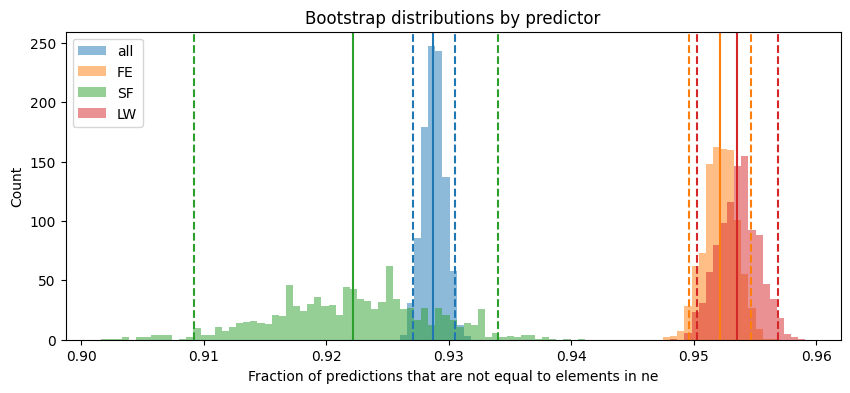

ne = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
all: 0.193630421865716
FE: 0.20247967479674797
SF: 0.2843243243243243
LW: 0.196
All vs FE: stat=9.417, p=0.002150
All vs SF: stat=94.064, p=0.000000
All vs LW: stat=0.487, p=0.485473


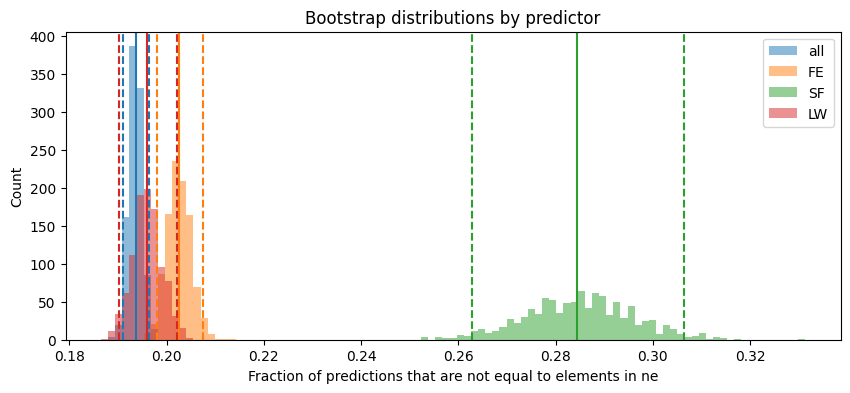

ne = [1, 99, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 95]
all: 0.1223767082590612
FE: 0.1546341463414634
SF: 0.2064864864864865
LW: 0.14955223880597016
All vs FE: stat=175.218, p=0.000000
All vs SF: stat=116.971, p=0.000000
All vs LW: stat=92.875, p=0.000000


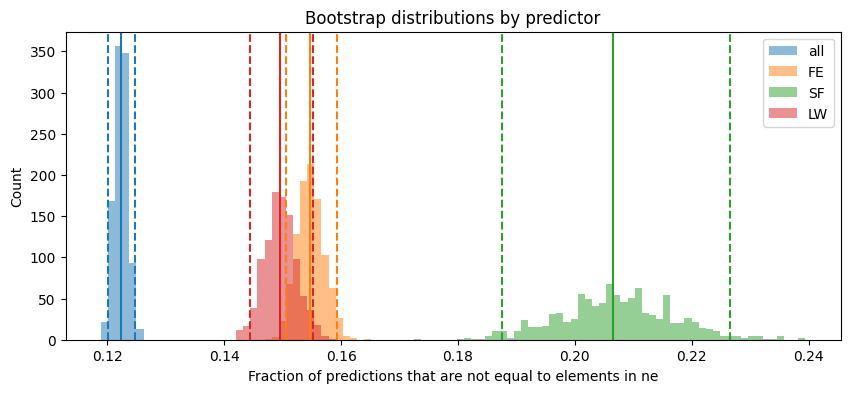

In [26]:
ne_options = [[1, 99], list(range(5, 100, 5)), [1, 99] + list(range(5, 100, 5))]

for ne in ne_options:
    print(f"ne = {ne}")

    # Calculate fractions
    fractions = util.calculate_not_equal_prediction_fractions(
        flattened_prediction_df, ne
    )
    for cls, frac in fractions.items():
        print(f"{cls}: {frac}")

    # Perform chi-square tests
    for cls in ["FE", "SF", "LW"]:
        stat, p = util.perform_ne_chi_square_test(
            fractions["all"],
            len(flattened_prediction_df[flattened_prediction_df["class"] == "all"]),
            fractions[cls],
            len(flattened_prediction_df[flattened_prediction_df["class"] == cls]),
        )
        print(f"All vs {cls}: stat={stat:.3f}, p={p:.6f}")

    # Perform bootstrap
    fractions_dist = util.perform_frac_ne_bootstrap(
        flattened_prediction_df, ne, silent=True
    )

    # Plot bootstrap distributions
    fig = plot.plot_frac_ne_bootstrap_distributions(
        fractions_dist, flattened_prediction_df, ne
    )
    plt.show()